<a href="https://colab.research.google.com/github/Nataliahfk/TELECOM-X---PARTE-2/blob/main/TelecomX_SegundaParte_Natalia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TELECOM X - PARTE 2: Previsión de cancelación en las suscripciones**

##**Descripción del proyecto:**

Desarrollo de modelos predictivos capaces de preveer que clientes tienen mayor probabilidad de cancelar sus suscripciones.

##**Objetivos:**

- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

#📊 **Preparar los datos para el modelado**

##1.1. Importando y conociendo los datos

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [532]:
#Importando datos
datos = pd.read_csv('/content/datos_tratados.csv')
datos.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,month to month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,month to month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,month to month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,month to month,1,mailed check,83.9,267.40,2.796667


In [533]:
datos.columns

Index(['id_cliente', 'abandono', 'genero', 'es_ciudadano_senior',
       'tiene_pareja', 'tiene_dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'tipo_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago',
       'cargos_mensuales', 'cargos_totales', 'cuentas_diarias'],
      dtype='object')

# 🛠️ Tratamiento de los Datos

✔️ Remover columnas irrelevantes

***Nota**: inicialmente, se eliminarán las varialbes id_cliente ya que esta no aporta poder predictivo debido a que es un simple identificador de cliente, y cuentas_diarias ya que esta variable fue agregada simplemente al dividir cargos_mensuales en 30 días, lo cual resulta redundante y no aporta ningun valor agregado al análisis.*

In [534]:
# Eliminación de Columnas Irrelevantes
datos.drop('id_cliente', axis=1, inplace=True)
datos.drop('cuentas_diarias', axis=1, inplace=True)
datos

,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,one year,1,mailed check,65.60,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,month to month,0,mailed check,59.90,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,month to month,1,electronic check,73.90,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,month to month,1,electronic check,98.00,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,month to month,1,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,one year,0,mailed check,55.15,742.90
7252,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,month to month,1,electronic check,85.10,1873.70
7253,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,month to month,1,mailed check,50.30,92.75
7254,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,two year,0,mailed check,67.85,4627.65


In [535]:
datos = datos.rename(columns={
    'es_ciudadano_senior': 'adulto_mayor',
})

In [536]:
datos.shape[0]

7256

In [537]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   adulto_mayor            7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_en_empresa        7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   lineas_multiples        7256 non-null   object 
 8   tipo_internet           7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  tv_streaming            7256 non-null   object 
 14  peliculas_streaming     7256 non-null   

In [538]:
print("\nEstadísticas Variables cualitativas:")
datos.describe(include='object')


Estadísticas Variables cualitativas:


,genero,lineas_multiples,tipo_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,metodo_pago
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,2,3,3,3,3,3,3,3,3,3,4
top,Male,No,Fiber optic,No,No,No,No,No,No,month to month,electronic check
freq,3669,3490,3198,3607,3181,3194,3581,2895,2866,4005,2445


In [539]:
columnas_categoricas = datos.select_dtypes(include='object').columns
print(columnas_categoricas)

Index(['genero', 'lineas_multiples', 'tipo_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_contrato', 'metodo_pago'],
      dtype='object')


#Distribución de la variable de respuesta (Cancelación)

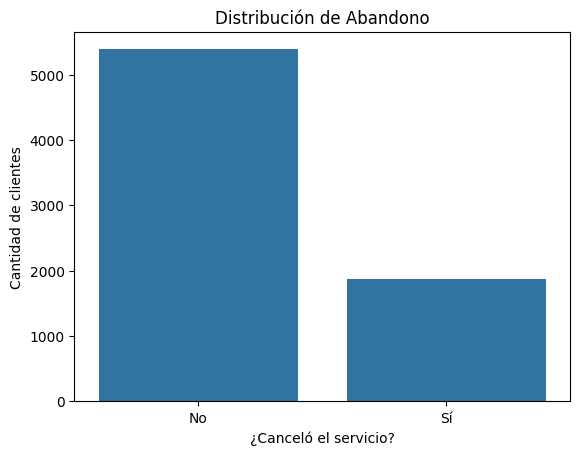

In [540]:
sns.countplot(data=datos, x='abandono')
plt.title('Distribución de Abandono')
plt.xlabel('¿Canceló el servicio?')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

#1.2. Visualización de las variables categóricas sobre Cancelaciones de los usuarios.

In [541]:
px.histogram(datos,x='genero',text_auto=True,color='abandono',barmode='group')

In [542]:
px.histogram(datos,x='tiene_pareja',text_auto=True,color='abandono',barmode='group')

In [543]:
px.histogram(datos,x='tiene_dependientes',text_auto=True,color='abandono',barmode='group')

In [544]:
datos['adulto_mayor'].value_counts(normalize=True).round(2)*100

,proportion
adulto_mayor,
0,84.0
1,16.0


In [545]:
px.histogram(datos,x='adulto_mayor',text_auto=True,color='abandono',barmode='group')

In [546]:
px.histogram(datos,x='tipo_internet',text_auto=True,color='abandono',barmode='group')

In [547]:
px.histogram(datos,x='tipo_contrato',text_auto=True,color='abandono',barmode='group')

In [548]:
px.histogram(datos,x='metodo_pago',text_auto=True,color='abandono',barmode='group')

**OBSERVACIONES**



---



+ Variables altamente correlacionadas con abandono:

tipo_contrato:
Los clientes con contrato "month to month" tienen una tasa de abandono notablemente mayor.

metodo_pago:
"Electronic check" tiene mayor abandono que pagos automáticos.

---

+ Variables con poca influencia visual:

genero:
 No hay diferencia significativa entre hombres y mujeres.

es_ciudadano_senior:
 Ligera diferencia, pero no muy marcada.

tiene_dependientes y tiene_pareja:
Patrones no evidentes.


#1.3. Visualización de las variables cuantitativas sobre Cancelaciones de los usuarios.

In [549]:
print("\nEstadísticas Variables cuantitativas:")
datos.describe()


Estadísticas Variables cuantitativas:


,abandono,adulto_mayor,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales
count,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.257580,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213
std,0.437332,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000


In [550]:
px.box(datos, x='meses_en_empresa',color='abandono')

In [551]:
px.box(datos, x='cargos_mensuales',color='abandono')

In [552]:
px.box(datos, x='cargos_totales',color='abandono')

#2. Tranformación de los datos

✔️ Agrupación de No y No service

✅ Resumen: Por qué agrupamos "No" y "No internet service"

🎯 Objetivo

Reducir multicolinealidad y simplificar los datos sin perder relevancia para el modelo predictivo.

---------------------------------------------------------------
⚠️ El problema original

   - Variables como OnlineSecurity, StreamingTV, etc., tenían tres categorías:

     - "Yes" → cliente usa el servicio
     - "No" → cliente tiene internet, pero no contrató el servicio
     - "No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio

Esto generaba multicolinealidad perfecta al transformar estas categorías en dummies, lo que:
   - Creaba correlación 1.0 entre variables
   - Generaba VIF infinito
   - Comprometía la estabilidad y el rendimiento de los modelos

-----------------------------------------------------------------
✅ La solución: agrupar "No internet service" como "No"

  - Agrupamos "No internet service" como "No" para simplificar la variable:

   - "Yes" = significa que usa el servicio
   - "No" = significa que no usa el servicio
   
Esto reduce la dimensionalidad y evita multicolinealidad.

La información de que el cliente no tiene internet sigue estando en la variable InternetService.

In [553]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   abandono                7256 non-null   int64  
 1   genero                  7256 non-null   object 
 2   adulto_mayor            7256 non-null   int64  
 3   tiene_pareja            7256 non-null   int64  
 4   tiene_dependientes      7256 non-null   int64  
 5   meses_en_empresa        7256 non-null   int64  
 6   servicio_telefonico     7256 non-null   int64  
 7   lineas_multiples        7256 non-null   object 
 8   tipo_internet           7256 non-null   object 
 9   seguridad_online        7256 non-null   object 
 10  respaldo_online         7256 non-null   object 
 11  proteccion_dispositivo  7256 non-null   object 
 12  soporte_tecnico         7256 non-null   object 
 13  tv_streaming            7256 non-null   object 
 14  peliculas_streaming     7256 non-null   

In [554]:
# para crear uno nuevo
datos_clean = datos.copy()

# === Etapa 1: Agrupar "No internet service" como "No"
cols_to_fix = ['seguridad_online','respaldo_online', 'proteccion_dispositivo',
               'soporte_tecnico','tv_streaming', 'peliculas_streaming']

for col in cols_to_fix:
    datos_clean[col] = datos_clean[col].replace('No internet service', 'No')

#2.2. Codificación de las variables categóricas:

**OBSERVACIONES**

- Para este proceso se aplico codificación OneHotEncoding mediante el método pd.getdummies y especificaremos nuestro conjunto de datos, las columnas que queremos codificar (columns=categóricas) y el tipo de dato (dtype) que será entero.

- Aicionalmente, se comprobo que en las columnas no existan valuores null y en caso de existir se retiraron.


In [555]:
datos.columns

Index(['abandono', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'meses_en_empresa', 'servicio_telefonico',
       'lineas_multiples', 'tipo_internet', 'seguridad_online',
       'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
       'factura_electronica', 'metodo_pago', 'cargos_mensuales',
       'cargos_totales'],
      dtype='object')

In [556]:
#codificación de las variables categóricas
datos_codificados = pd.get_dummies(data=datos_clean,columns=columnas_categoricas, dtype=int)
datos_codificados.sample(5)

,abandono,adulto_mayor,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,genero_Female,...,tv_streaming_Yes,peliculas_streaming_No,peliculas_streaming_Yes,tipo_contrato_month to month,tipo_contrato_one year,tipo_contrato_two year,metodo_pago_bank transfer automatic,metodo_pago_credit card automatic,metodo_pago_electronic check,metodo_pago_mailed check
578,0,0,1,0,71,1,0,19.10,1372.45,1,...,0,1,0,0,0,1,0,1,0,0
6057,0,0,0,0,1,1,0,47.95,47.95,0,...,0,1,0,1,0,0,0,0,1,0
996,0,0,0,0,11,1,1,69.35,712.25,0,...,1,0,1,1,0,0,0,0,1,0
5208,1,1,1,0,61,1,1,104.40,6405.00,1,...,1,0,1,0,1,0,0,1,0,0
6033,0,1,0,0,5,1,0,59.90,287.85,1,...,0,1,0,1,0,0,0,1,0,0


In [557]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   abandono                             7256 non-null   int64  
 1   adulto_mayor                         7256 non-null   int64  
 2   tiene_pareja                         7256 non-null   int64  
 3   tiene_dependientes                   7256 non-null   int64  
 4   meses_en_empresa                     7256 non-null   int64  
 5   servicio_telefonico                  7256 non-null   int64  
 6   factura_electronica                  7256 non-null   int64  
 7   cargos_mensuales                     7256 non-null   float64
 8   cargos_totales                       7256 non-null   float64
 9   genero_Female                        7256 non-null   int64  
 10  genero_Male                          7256 non-null   int64  
 11  lineas_multiples_No           

#2.3. Análisis de correlación:

In [563]:
datos_corr = datos_codificados.corr()
datos_corr

,abandono,adulto_mayor,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,genero_Female,...,tv_streaming_Yes,peliculas_streaming_No,peliculas_streaming_Yes,tipo_contrato_month to month,tipo_contrato_one year,tipo_contrato_two year,metodo_pago_bank transfer automatic,metodo_pago_credit card automatic,metodo_pago_electronic check,metodo_pago_mailed check
abandono,1.000000,0.146400,-0.148106,-0.160347,-0.345799,0.012337,0.186309,0.189393,-0.194440,0.009494,...,0.062456,-0.060092,0.060092,0.395067,-0.174340,-0.294467,-0.114953,-0.131448,0.294181,-0.089198
adulto_mayor,0.146400,1.000000,0.023439,-0.212338,0.017333,0.009885,0.157470,0.220098,0.103499,0.004239,...,0.103719,-0.119049,0.119049,0.136278,-0.047054,-0.114058,-0.015819,-0.022914,0.170320,-0.153742
tiene_pareja,-0.148106,0.023439,1.000000,0.448500,0.379684,0.019496,-0.010303,0.098064,0.316918,0.004593,...,0.124575,-0.116399,0.116399,-0.277182,0.081293,0.245737,0.109764,0.081899,-0.079001,-0.099416
tiene_dependientes,-0.160347,-0.212338,0.448500,1.000000,0.163444,-0.003212,-0.110541,-0.114345,0.063960,-0.011884,...,-0.014971,0.038832,-0.038832,-0.228649,0.069582,0.200304,0.051254,0.062449,-0.150424,0.057690
meses_en_empresa,-0.345799,0.017333,0.379684,0.163444,1.000000,0.009661,0.006662,0.246981,0.825118,-0.005936,...,0.281232,-0.286157,0.286157,-0.650810,0.205752,0.562783,0.241031,0.235126,-0.208832,-0.232690
servicio_telefonico,0.012337,0.009885,0.019496,-0.003212,0.009661,1.000000,0.013804,0.247323,0.113791,0.006065,...,-0.024215,0.034847,-0.034847,-0.002686,-0.001727,0.004780,0.008099,-0.009893,0.004488,-0.003330
factura_electronica,0.186309,0.157470,-0.010303,-0.110541,0.006662,0.013804,1.000000,0.353503,0.159303,0.011417,...,0.224965,-0.212314,0.212314,0.167119,-0.051231,-0.146044,-0.018482,-0.011833,0.208592,-0.205076
cargos_mensuales,0.189393,0.220098,0.098064,-0.114345,0.246981,0.247323,0.353503,1.000000,0.652109,0.013126,...,0.628935,-0.627997,0.627997,0.058554,0.008672,-0.076567,0.038141,0.031132,0.275064,-0.377800
cargos_totales,-0.194440,0.103499,0.316918,0.063960,0.825118,0.113791,0.159303,0.652109,1.000000,-0.000488,...,0.516900,-0.521245,0.521245,-0.447152,0.175040,0.354547,0.180882,0.184990,-0.057178,-0.295076
genero_Female,0.009494,0.004239,0.004593,-0.011884,-0.005936,0.006065,0.011417,0.013126,-0.000488,1.000000,...,0.007222,-0.012109,0.012109,0.001181,-0.007063,0.005361,0.018316,-0.001102,-0.002149,-0.014537


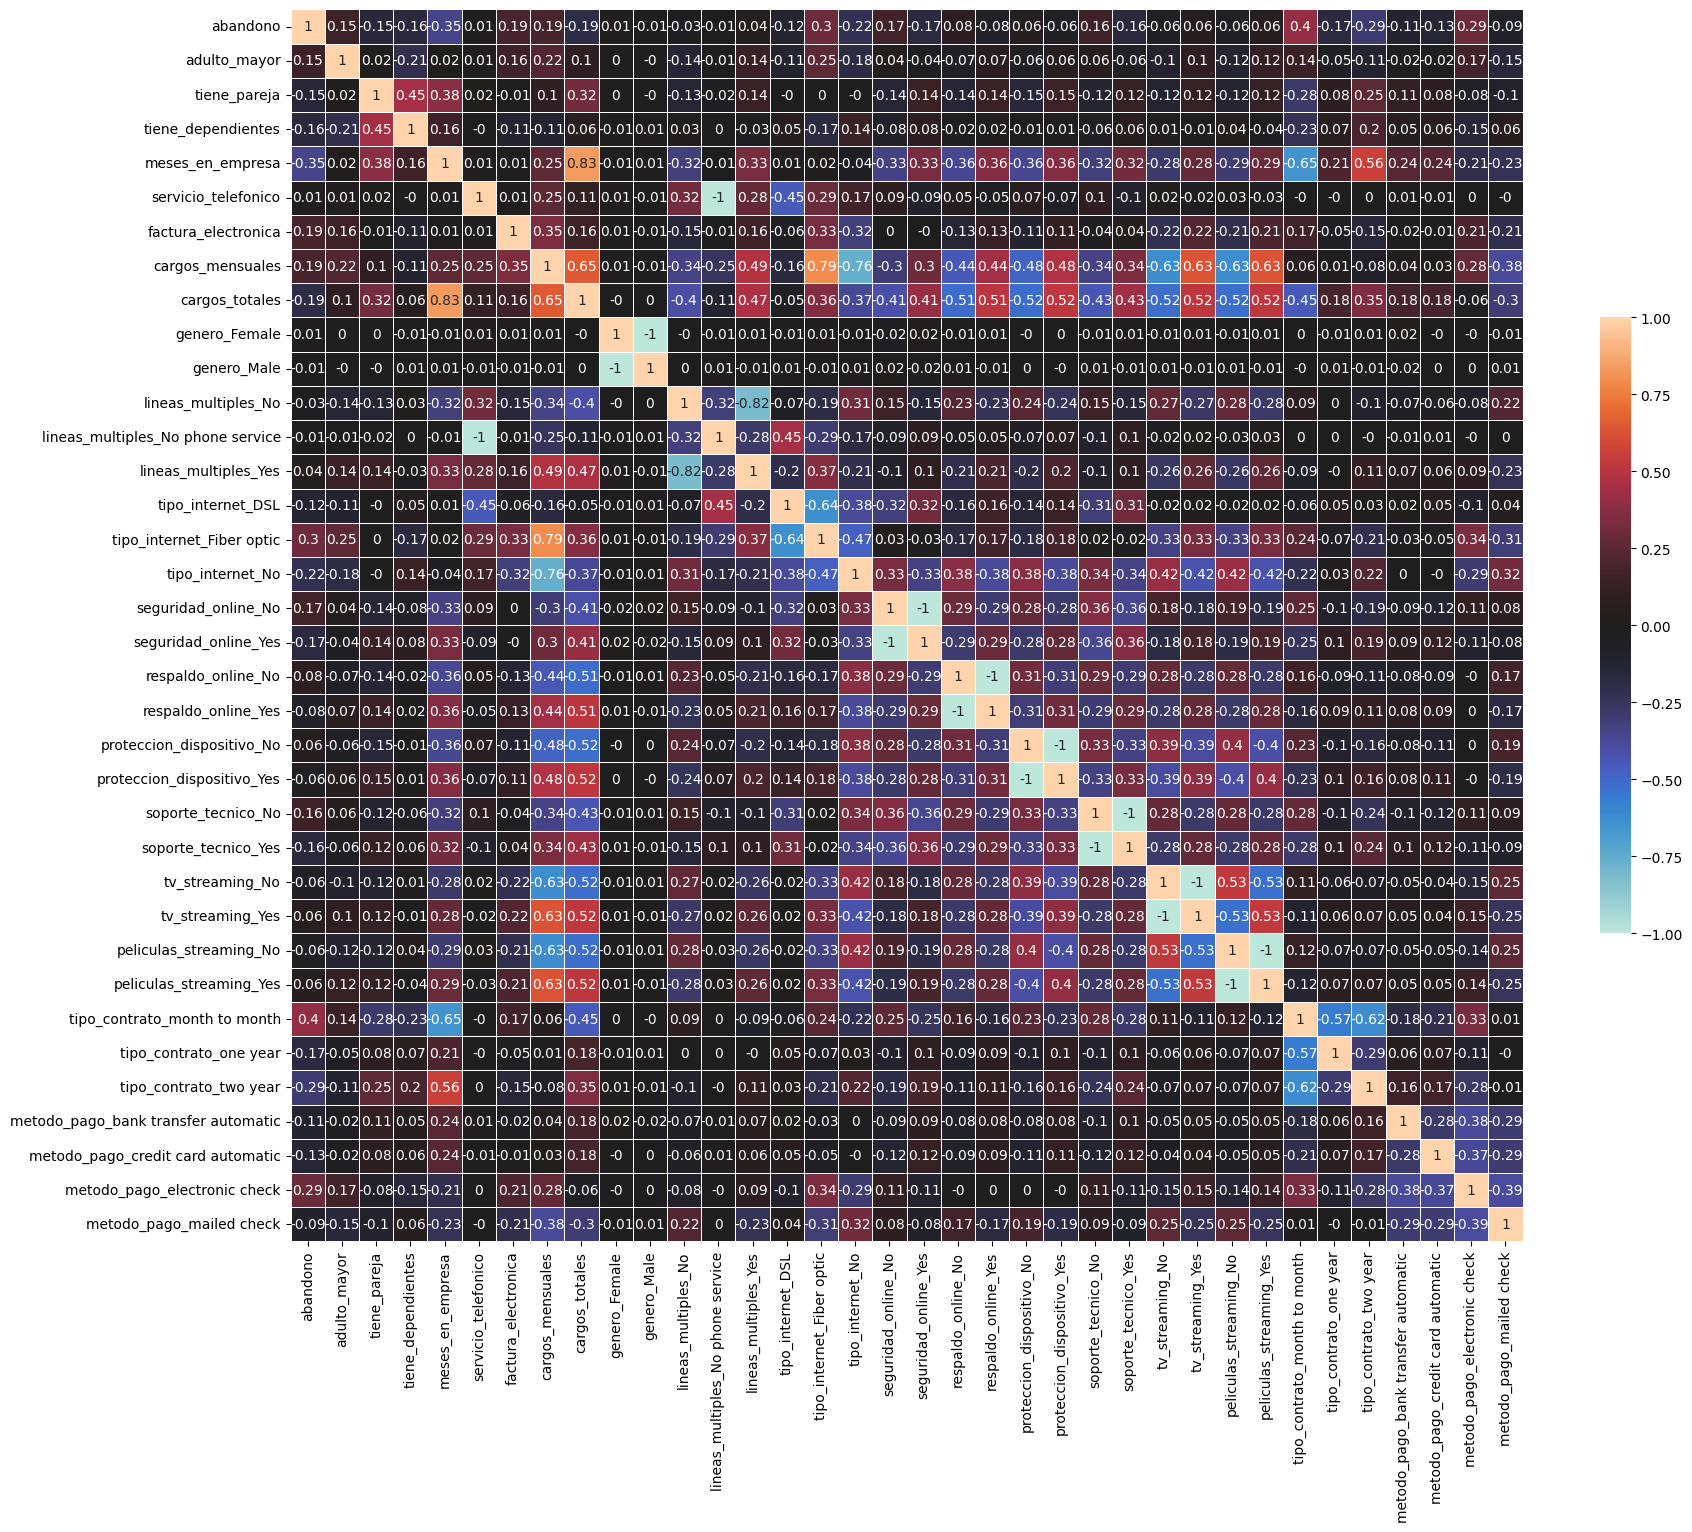

In [564]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(datos_corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

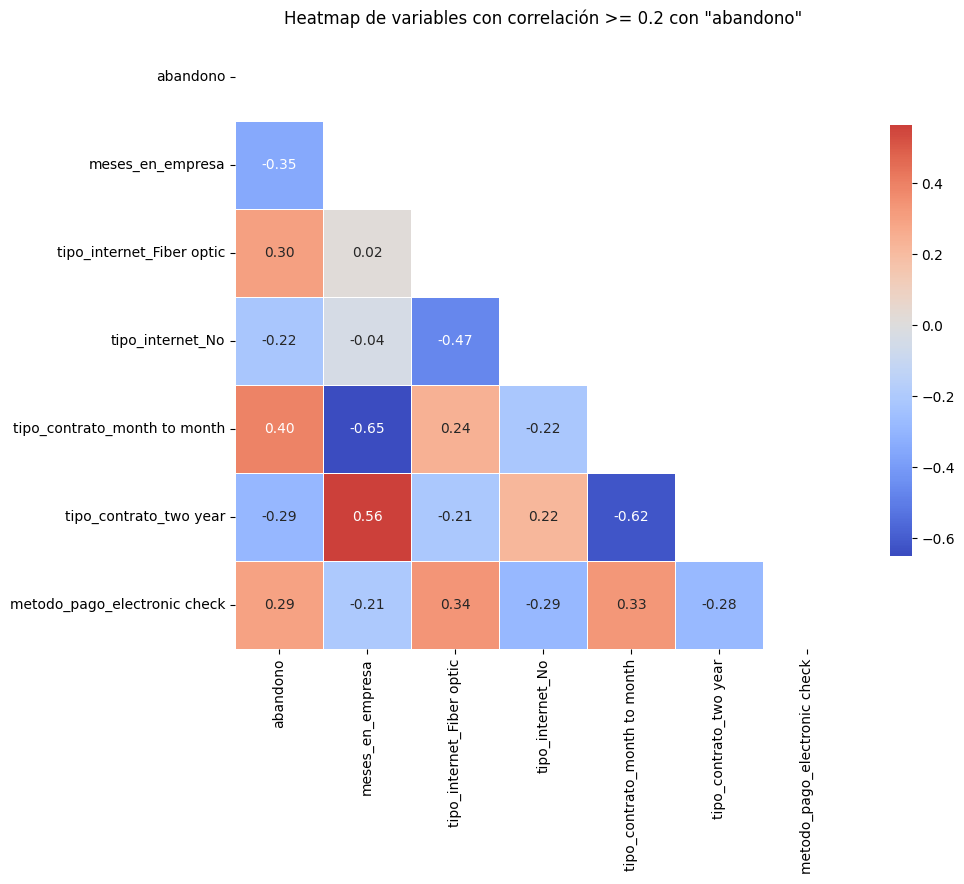

In [568]:
# Definir la variable objetivo
target = 'abandono'

# Definir el umbral mínimo de correlación absoluta para selección
umbral = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = datos_corr.index[abs(datos_corr[target]) >= umbral].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target not in variables_relevantes:
  variables_relevantes.append(target)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = datos_corr.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {umbral} con "{target}"')
plt.show()

Explicación del uso del umbral y de la máscara en el heatmap de correlación

Cuando trabajamos con análisis de correlación entre muchas variables, la matriz de correlación puede volverse muy grande y difícil de interpretar visualmente. Por ejemplo, si tenemos 50 variables, la matriz tendrá 50 x 50 = 2500 valores, lo que genera un gráfico confuso y poco informativo.

Uso del umbral para selección de variables relevantes

Para facilitar el análisis, elegimos un umbral de correlación absoluta respecto a la variable objetivo (en este caso, "Evasión").

Este umbral es un valor mínimo para considerar que la correlación es relevante o significativa para nuestro análisis.
Por ejemplo, un umbral de 0.3 significa que solo vamos a mirar variables cuya correlación con "Evasión" sea mayor que 0.3 (positiva o negativa).
Variables con correlación por debajo de ese valor tienden a no tener influencia importante o clara sobre la variable objetivo y, por eso, se descartan para esta visualización.
Esto ayuda a reducir el número de variables, haciendo el heatmap más legible y enfocado en las relaciones importantes.
Nota: El valor exacto del umbral puede variar según el contexto, pero generalmente valores entre 0.2 y 0.5 son buenos puntos de partida para análisis exploratorios.